In [109]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import matplotlib.gridspec as gridspec

import glob
from pathlib import Path

from filter.RaymondFilters import RaymondFilter

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from plot_tools import *

# Local import 

from spectra.py_spectra import *

# High Pass values for various values of dx - because of high pass, we want the lowpass filter cutoff to have
# a large (R~0.9) value

npass = 6

dx    = 8

klevel= [25]

filtered_W_name = "W_%2.2i" % dx

print(filtered_W_name)

# Helper functions......

def add_fhour(ds):
    
    filename = ds.encoding["source"].split("_")
    
    init_time = int(filename[-2])
    fhour     = int(filename[-1][-5:-3])
        
    ds.coords['fhour'] = fhour
    ds.coords['init_time'] = init_time
    
    return ds
    

def read_mfdataset_list(data_dir, pattern):
    """
    Use xarray.open_mfdataset to read multiple netcdf files from a list.
    """
    filelist = os.path.join(data_dir,pattern)
    return xr.open_mfdataset(filelist, preprocess=add_fhour, combine='nested', concat_dim=['fhour'],parallel=True)

def save_mfdataset_list(ds, dir, gridType=None):
    """
    Use xarray.save_mfdataset to save multiple netcdf files from a list, using the original file strings as a pattern
    """

    # Use new pathlib for Python > 3.5
    Path(dir).mkdir(parents=True, exist_ok=True)

    for n, hour in enumerate(ds.fhour):
        fcstHour  = ds.isel(fhour=n).fhour.values
        fcstStart = ds.isel(fhour=n).fcstStart
        date      = ds.isel(fhour=n).date      
        
        if gridType == None:
            gridType = ds.isel(fhour=n).attrs['gridType']
            
        outfilename = os.path.join(dir, '%s_%08d%02d_F%02d.nc' % (gridType, date, fcstStart, fcstHour))
        
        ds.isel(fhour=n).to_netcdf(outfilename, mode='w')  
        print(f'Successfully wrote new data to file:: {outfilename}','\n')
    
    return


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
W_08



Plot Lat Min: 34.4  Lat Max:  48.5

Plot Lon Min: -100.5  Lon Max:  -83.7
RaymondFilter6F:  Input array is 3D, 2D filtering implemented on outer two dimensions

RaymondFilter6F:  NPASS:  6 

NPass Loop for 3D array took 20.7844 seconds


Plot Lat Min: 34.4  Lat Max:  48.5

Plot Lon Min: -100.5  Lon Max:  -83.7
Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr_W_08/filtered_202008100600_F10.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr_W_08/filtered_202008100600_F11.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr_W_08/filtered_202008100600_F12.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr_W_08/filtered_202008100600_F13.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2020081006/hrrr_W_08/filtered_202008100600_F14.nc 

Successfully wrote new data to file:: /Users/Louis.W

/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


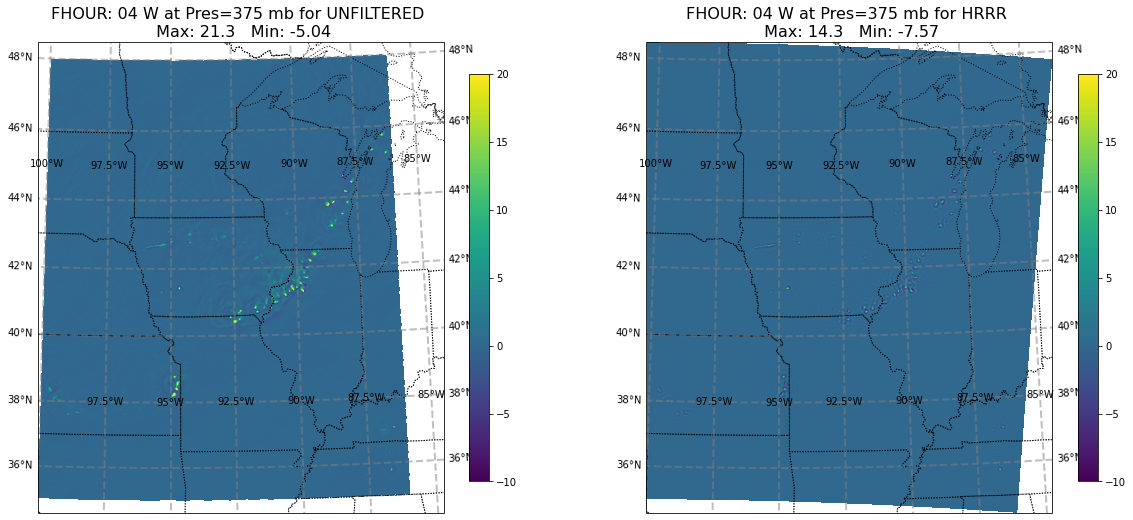

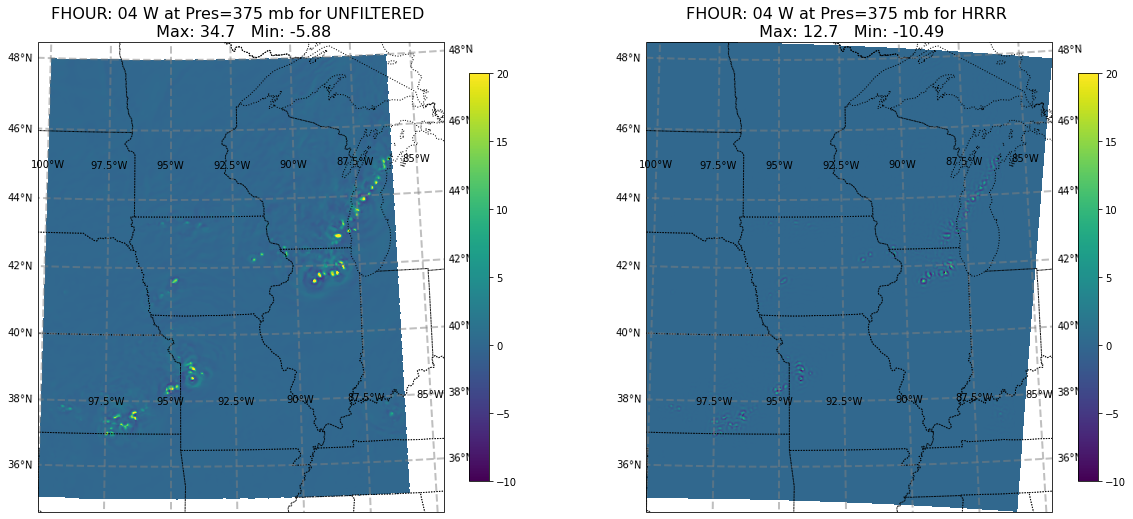

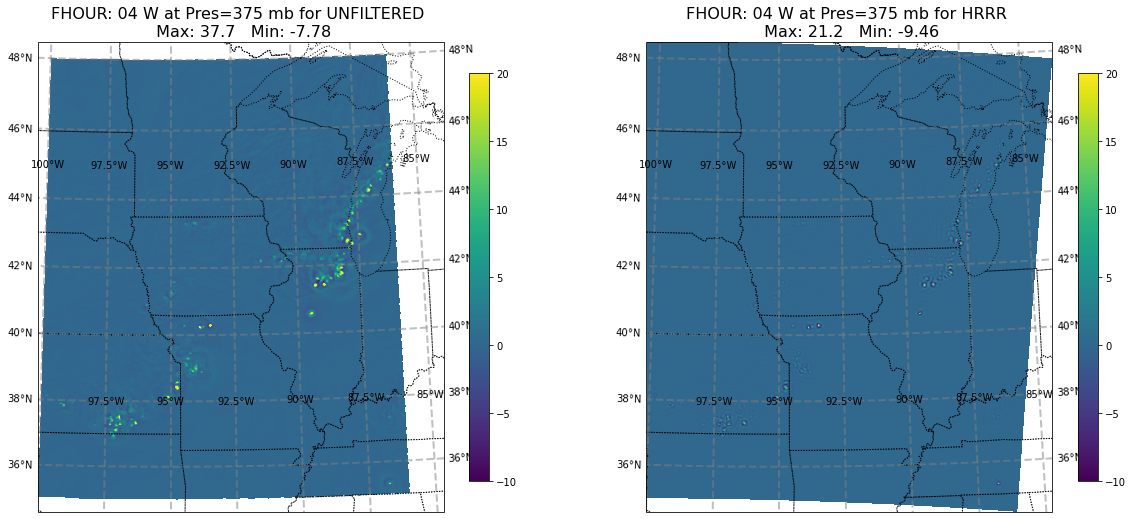

In [115]:
# Open data sets

def filter_ds(dir, output_dir, suffix, dx = 10, npass = 6, writeout=False):
    
    new_dir = "%s_%s" % (output_dir, suffix)
    
    ds  = read_mfdataset_list(dir , "region_*.nc")

    # Set up cartopy stuff here, so the plot routine is already set to use it.

    fig, axes = init_cartopy_plot(ncols=2, nrows=1, figsize=(20,10))

    # Plot the initial data

    cb_info = plot_w_from_xarray(ds, klevel=klevel, fhour=4, title='UNFILTERED', ax = axes[0])

    # Convert to numpy arrays, fill in zeros

    w = np.nan_to_num(ds.W.values).astype('float64')

    nhour, nz, ny, nx = w.shape

    w = w.reshape(nhour*nz, ny, nx)

    w_filtered = RaymondFilter(w, dx, order=6, npass = npass, highpass=True)

    ds['W'] = xr.DataArray(w_filtered.reshape(nhour,nz,ny,nx), dims = ['fhour','nz','ny','nx'])

    # Plot the Filtered data

    cb_info = plot_w_from_xarray(ds, klevel=klevel, fhour=4, title='FILTERED', ax = axes[1])

    if writeout:
        save_mfdataset_list(ds, new_dir, gridType='filtered')
    
    return

{'input_dir': '/Users/Louis.Wicker/CAM_Case_Studies', 'output_dir': '/Users/Louis.Wicker/CAM_Case_Studies', 'cases': {'2019071918': ['hrrr', 'ctrl', 'nord3'], '2020081006': ['hrrr', 'ctrl', 'nord3']}}

Plot Lat Min: 37.0  Lat Max:  50.8

Plot Lon Min: -97.1  Lon Max:  -79.0
RaymondFilter6F:  Input array is 3D, 2D filtering implemented on outer two dimensions

RaymondFilter6F:  NPASS:  6 

NPass Loop for 3D array took 19.1761 seconds


Plot Lat Min: 37.0  Lat Max:  50.8

Plot Lon Min: -97.1  Lon Max:  -79.0
Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2019071918/hrrr_W_08/filtered_201907191800_F04.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2019071918/hrrr_W_08/filtered_201907191800_F05.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2019071918/hrrr_W_08/filtered_201907191800_F06.nc 

Successfully wrote new data to file:: /Users/Louis.Wicker/CAM_Case_Studies/2019071918/hrrr_W_08/filtered_20

/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/Users/Louis.Wicker/miniconda3/envs/mypip/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


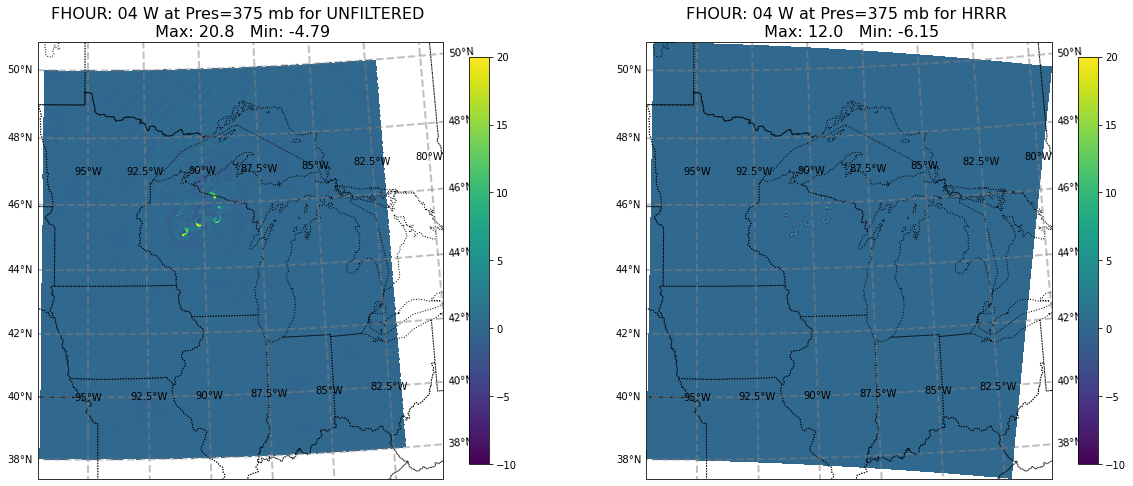

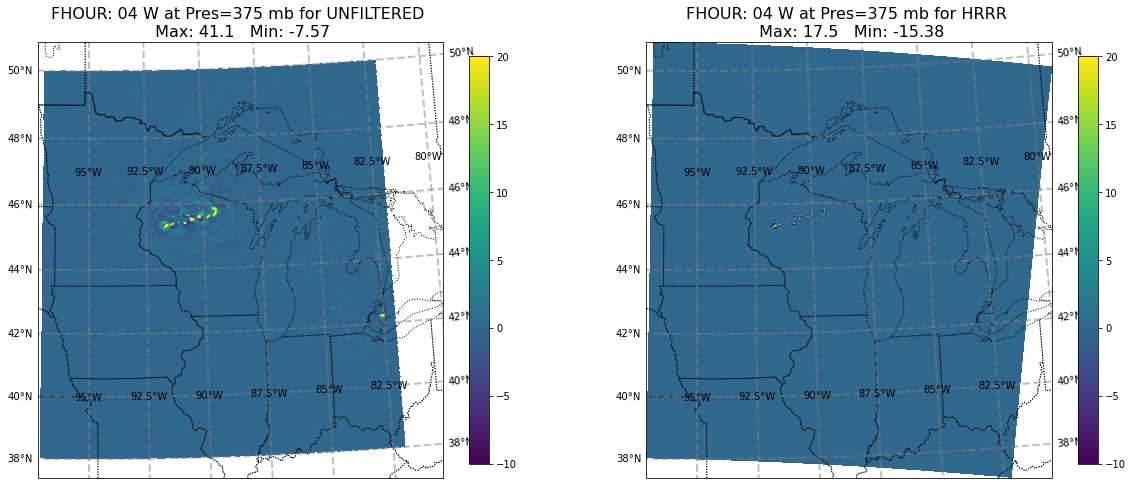

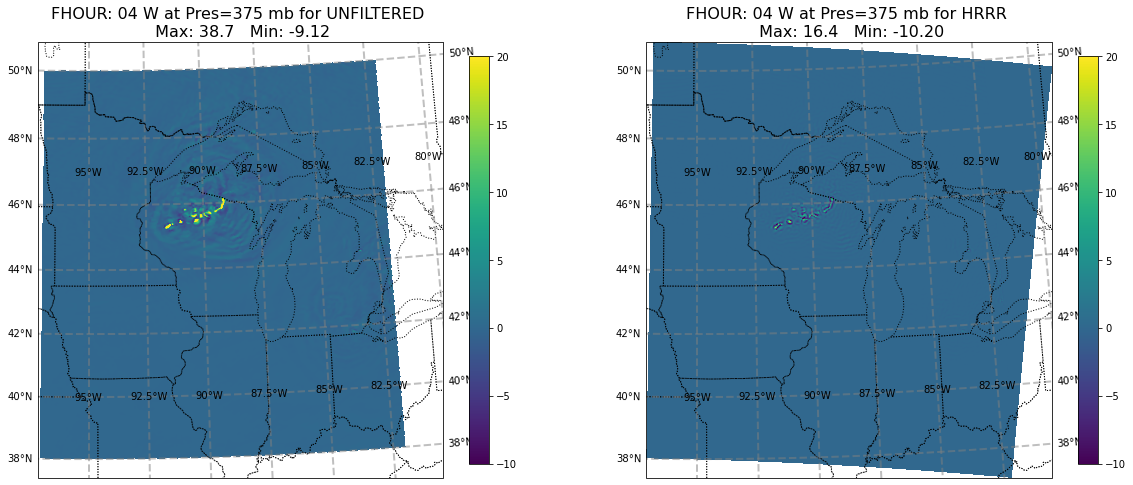

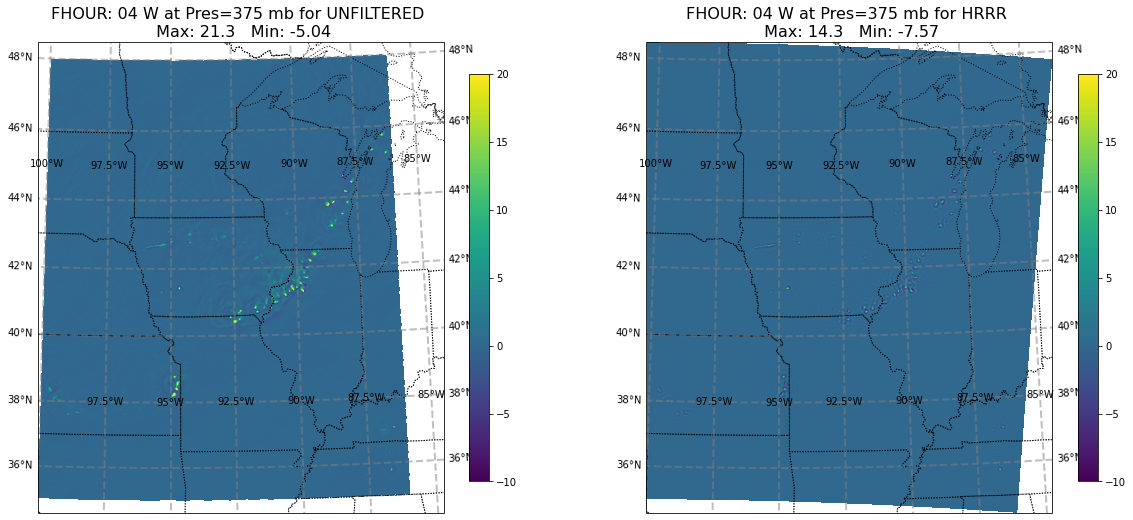

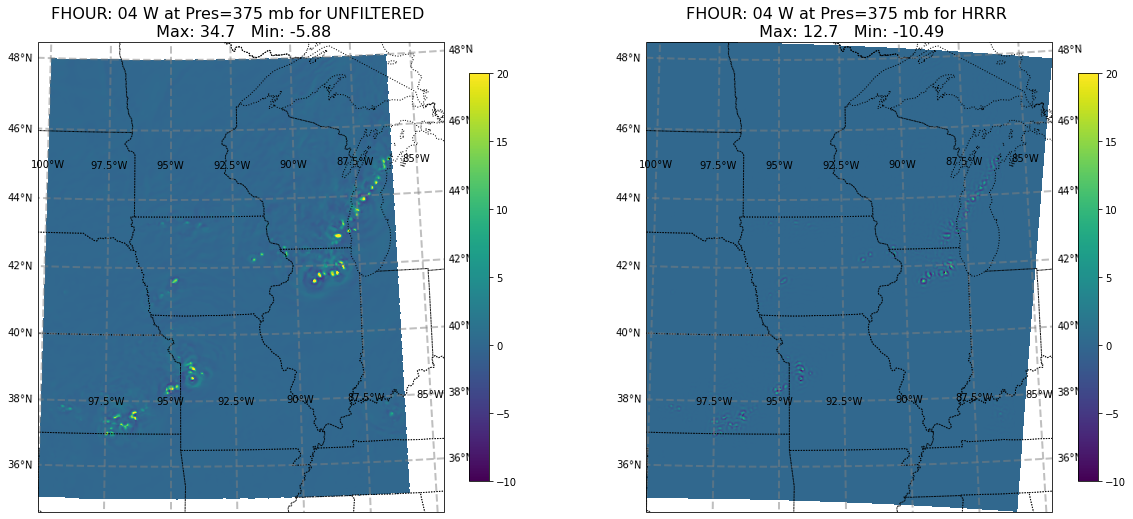

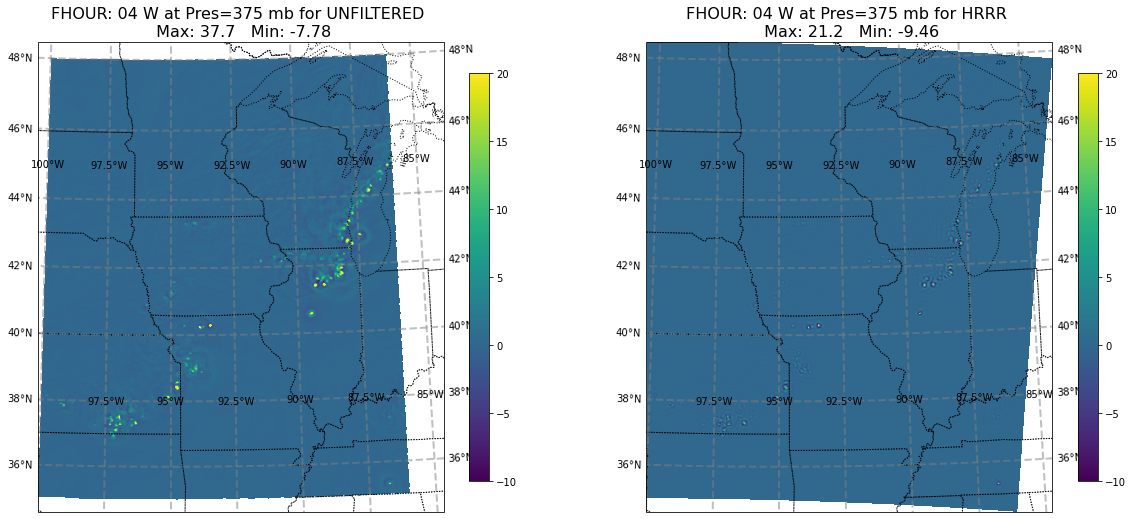

In [126]:
# Input data sets....

from input import input_spec

input_dir  = input_spec["input_dir"]
output_dir = input_spec["output_dir"]

filtered_filename = input_spec["filtered_filename"]
filter_dx         = input_spec["filter_dx"]
filter_npass      = input_spec["filter_npass"]

if len(filtered_filename) == 0:
    filtered_filename = "W_%2.2i" % filter_dx
    
#------------------------------------------------------------------------------------
# cut and past from below here
#

print("\n====> Begin processing runs\n")

print("-------> Parameter Filter SCALE: %d \n" % filter_dx)
print("-------> Parameter        NPASS: %d \n" % filter_npass)
print("-------> Parameter FILTERED FILE DIRECTORY: %s \n" % filtered_filename)

for day in input_spec["cases"]:
    for run in input_spec["cases"][day]:
        
        print("\n----> Processing run: %s for day:  %s \n" % (run,day))
        run_dir = str(os.path.join(input_dir, day, run))
        out_dir = str(os.path.join(output_dir, day, run))
        filter_ds(run_dir, out_dir, filtered_filename, dx=filter_dx, npass=filter_npass, writeout=Fals
        
print("\n====> Ended processing runs\n")


In [140]:
import json

with open("sample.json", "w") as outfile:
    json.dump(input_spec, outfile)
    
import yaml
with open("sample.yaml", "w") as outfile:
    yaml.dump(input_spec, outfile)

In [141]:
with open("sample.yaml", "r") as outfile:
    d = yaml.load(outfile, Loader=yaml.FullLoader)
    
print(d)

{'cases': {'2019071918': ['hrrr', 'ctrl', 'nord3'], '2020081006': ['hrrr', 'ctrl', 'nord3']}, 'input_dir': '/Users/Louis.Wicker/CAM_Case_Studies', 'output_dir': '/Users/Louis.Wicker/CAM_Case_Studies'}


In [134]:
yaml.load?

Signature: yaml.load(stream, Loader)
Docstring:
Parse the first YAML document in a stream
and produce the corresponding Python object.
File:      ~/miniconda3/envs/mypip/lib/python3.9/site-packages/yaml/__init__.py
Type:      function


In [142]:
f = ""
print(len(f))

0
